<a href="https://colab.research.google.com/github/csabiu/cosmology-class/blob/main/Astronomy_CMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download CMB data from WMAP 

In [3]:
!pip install camb
!pip install healpy
!wget https://lambda.gsfc.nasa.gov/data/map/dr5/dcp/spectra/wmap_tt_spectrum_9yr_v5.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 3.8 MB/s 
  Created wheel for camb: filename=camb-1.3.6-py3-none-any.whl size=1044377 sha256=aa6853db3ca8df8b9621f519ea3164631afa60fd682fef66ab091933bc8a035c
  Stored in directory: /root/.cache/pip/wheels/bd/67/8c/7ccb547de7a94170c67cc3294f520e48451d1947bb26572bce
Successfully built camb
--2022-12-12 07:39:52--  https://lambda.gsfc.nasa.gov/data/map/dr5/dcp/spectra/wmap_tt_spectrum_9yr_v5.txt
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88635 (87K) [text/plain]
Saving to: ‘wmap_tt_spectrum_9yr_v5.txt.2’

wmap_tt_spectrum_9y 100%[===================>]  86.56K   147KB/s    in 0.6s    

2022-12-12 07:39:54 (147 KB/s) - ‘wmap_tt_spectrum_9yr_v5.txt.2’ s

In [7]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

# investigate baryon change

In [33]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.152, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: 
  print(name)


total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(2551, 4)


Text(0.5, 0, '$\\ell$')

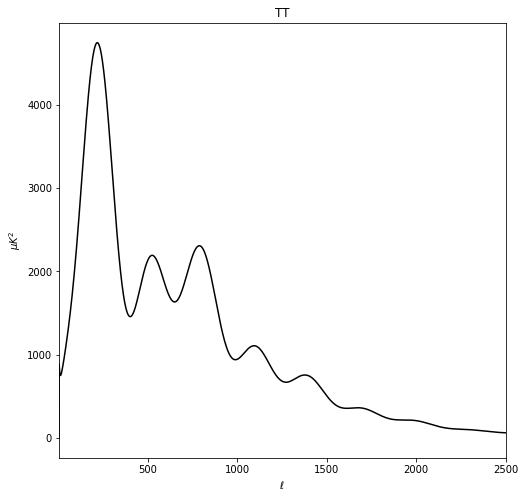

In [34]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(ls,totCL[:,0], color='k')
#ax.plot(ls,unlensedCL[:,0], color='r')
ax.set_title('TT')
ax.set_xlim([2,2500])
ax.set_ylabel(r'$\mu K^{2}$')
ax.set_xlabel(r'$\ell$')

In [ ]:

pars.set_cosmology(H0=67.5, ombh2=0.012, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='r',label='$\omega_bh^2=0.012$')

pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='b',label='$\omega_bh^2=0.022$')

pars.set_cosmology(H0=67.5, ombh2=0.032, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='g',label='$\omega_bh^2=0.032$')

plt.legend()
plt.xlim([0,1200])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')


# changing amount of dark matter

Text(0, 0.5, '$C_{\\ell}$')

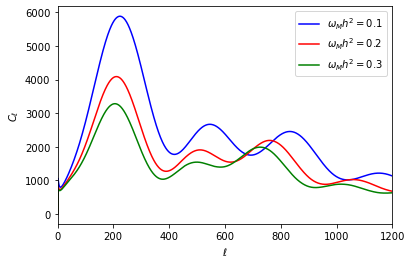

In [ ]:
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.1, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='b',label='$\omega_Mh^2=0.1$')

pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.2, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK',)
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='r',label='$\omega_Mh^2=0.2$')

pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.3, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='g',label='$\omega_Mh^2=0.3$')

plt.legend()
plt.xlim([0,1200])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')

# changing curvature

Text(0, 0.5, '$C_{\\ell}$')

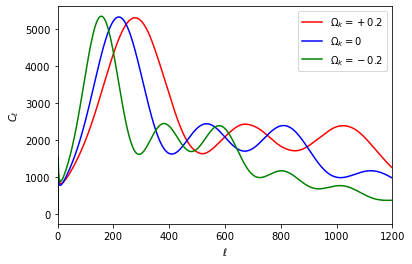

In [ ]:
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.2, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='r',label='$\Omega_k=+0.2$')

pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='b',label='$\Omega_k=0$')

pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=-0.2, tau=0.06)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
plt.plot(ls[:1199],totCL[:1199,0], color='g',label='$\Omega_k=-0.2$')

plt.legend()
plt.xlim([0,1200])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')

# Load and plot the WMAP data

Text(0, 0.5, '$C_{\\ell}$')

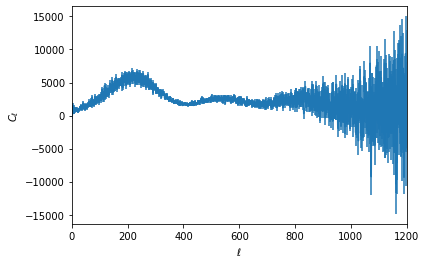

In [6]:
x=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt')
ell=x[:,0]
cl=x[:,1]
err=x[:,2]
np.shape(err)

plt.errorbar(ell,cl,err,marker=None, linestyle=None)
plt.xlim([0,1200])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')

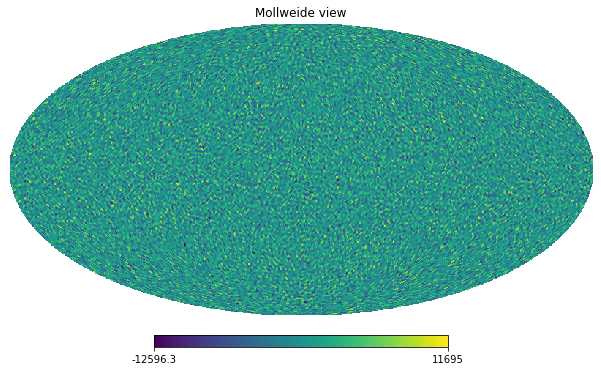

In [38]:
map=hp.synfast(totCL[:,0],64)
hp.visufunc.mollview(map=map)

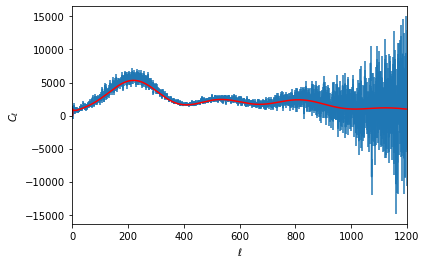

In [ ]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']

ls = np.arange(totCL.shape[0])
plt.errorbar(ell,cl,err,marker=None, linestyle=None,zorder=1)

plt.plot(ls[:1199],totCL[:1199,0], 'r-')

plt.xlim([0,1200])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()